In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("../ift6758/data/preprocessed_data/preprocessed_game_data.csv")
df['is_goal'] = df['type'] == 'goal'

In [17]:
df

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,type,...,shooting_player_id,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal
0,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,54,1,00:38,shot-on-goal,...,8477504,Josh Morrissey,8475883.0,Frederik Andersen,-36.0,-28.0,52,wrist,O,False
1,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,55,1,00:49,shot-on-goal,...,8473574,Shawn Matthias,8475883.0,Frederik Andersen,-75.0,1.0,52,wrist,O,False
2,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,58,1,01:03,shot-on-goal,...,8473412,Bryan Little,8475883.0,Frederik Andersen,-73.0,10.0,52,backhand,O,False
3,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,62,1,01:46,shot-on-goal,...,8470611,Eric Fehr,8473461.0,Steve Mason,80.0,-3.0,10,wrist,O,False
4,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,68,1,03:42,shot-on-goal,...,8479339,Patrik Laine,8475883.0,Frederik Andersen,-44.0,-21.0,52,snap,O,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449405,2022021312,20222023,2023-04-13,Seattle,Kraken,Golden Knights,445,3,14:48,shot-on-goal,...,8477447,Shea Theodore,8475831.0,Philipp Grubauer,-77.0,-21.0,54,wrist,O,False
449406,2022021312,20222023,2023-04-13,Seattle,Kraken,Golden Knights,449,3,15:38,shot-on-goal,...,8476457,Adam Larsson,8476316.0,Laurent Brossoit,66.0,-12.0,55,wrist,O,False
449407,2022021312,20222023,2023-04-13,Seattle,Kraken,Golden Knights,495,3,17:14,shot-on-goal,...,8479987,Morgan Geekie,8476316.0,Laurent Brossoit,81.0,7.0,55,wrist,O,False
449408,2022021312,20222023,2023-04-13,Seattle,Kraken,Golden Knights,756,3,19:22,goal,...,8476905,Chandler Stephenson,NaN,NaN,47.0,19.0,54,poke,D,True


# Figure 3.1: most dangerous kind of shots ? most common type of shots ?
The most dangerous kind of shot seems to be the deflection (18% of chance of scoring). This makes sense because it's very hard for goalie to catch an imprevisible shot like this one.
It's also worth noting that the "tip-in" shot is very dangerous (16% chance of scoring), but it's also very difficult to make that shot. 
All the other shot types have less than 10% change of being goals.


The wrist shot is the most common, and not the most dangerous one. However, it's the shot that produces the highest number of goals overall.

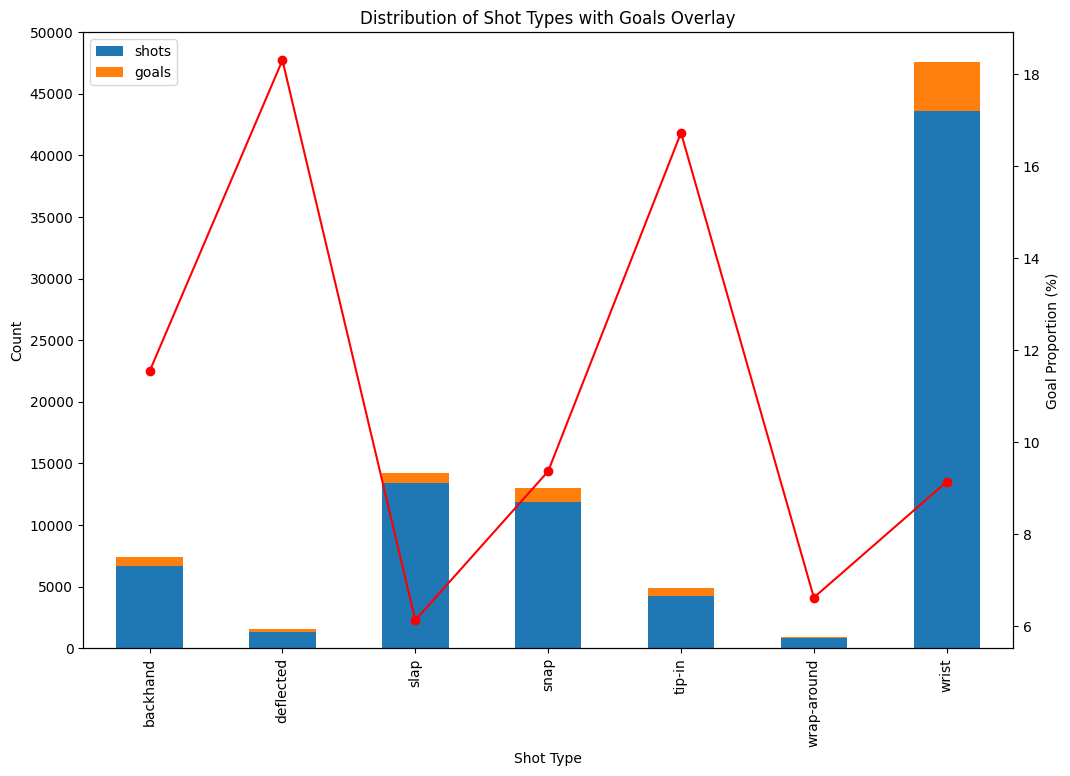

In [21]:
df_2017 = df[df['season'] == 20172018]

# Calculate the number of goals for each shot type
goal_counts = df_2017[df_2017['type'] == 'goal']['shot_type'].value_counts()

# Overlay the number of goals over the number of shots
shot_type_distribution = pd.DataFrame({
    'shots': df_2017['shot_type'].value_counts(),
    'goals': goal_counts
}).fillna(0)

# Calculate the proportion of goals per shot type
shot_type_distribution['goal_proportion'] = shot_type_distribution['goals'] / shot_type_distribution['shots']

# Plot the distribution of shots and goals
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for shots and goals
shot_type_distribution[['shots', 'goals']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribution of Shot Types with Goals Overlay')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Count')
y_ticks_labels = range(0, max(shot_type_distribution['shots'] + shot_type_distribution['goals']) + 5000, 5000)
ax1.set_yticks(y_ticks_labels)

# Create a secondary y-axis for the goal proportion
ax2 = ax1.twinx()
shot_type_distribution['goal_proportion'] *= 100 
shot_type_distribution['goal_proportion'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Goal Proportion (%)')

plt.show()

# Figure 3.2
-  seems like the shots

In [10]:
# Calculate the distance from the goal (assuming the goal is at (-100, 0) or (100, 0))
df['distance'] = df.apply(lambda row: min(((row['x_coord'] + 100)**2 + row['y_coord']**2)**0.5, ((row['x_coord'] - 100)**2 + row['y_coord']**2)**0.5), axis=1)
df[df['distance'] > 100]

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,type,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
510,2017020008,20172018,2017-10-05,Ottawa,Senators,Capitals,298,2,09:00,shot-on-goal,...,Brooks Orpik,8467950.0,Craig Anderson,-6.0,35.0,15,slap,N,False,100.304536
2093,2017020031,20172018,2017-10-08,New York,Rangers,Canadiens,478,3,07:13,shot-on-goal,...,Mika Zibanejad,8471679.0,Carey Price,-4.0,29.0,3,wrist,N,False,100.284595
2509,2017020038,20172018,2017-10-09,Anaheim,Ducks,Flames,62,1,01:49,shot-on-goal,...,Johnny Gaudreau,8476434.0,John Gibson,-7.0,-37.0,20,tip-in,N,False,100.089960
2611,2017020039,20172018,2017-10-10,New York,Rangers,Blues,504,3,01:14,shot-on-goal,...,Alex Pietrangelo,8468685.0,Henrik Lundqvist,3.0,-39.0,19,wrist,N,False,104.546640
2927,2017020044,20172018,2017-10-10,Vancouver,Canucks,Senators,604,3,00:39,shot-on-goal,...,Derek Dorsett,8467950.0,Craig Anderson,0.0,10.0,23,deflected,N,False,100.498756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81200,2017021261,20172018,2018-04-07,Sunrise,Panthers,Sabres,238,2,04:53,shot-on-goal,...,Nathan Beaulieu,8473503.0,James Reimer,0.0,21.0,7,slap,N,False,102.181212
81268,2017021262,20172018,2018-04-07,Washington,Capitals,Devils,239,2,10:43,shot-on-goal,...,Andy Greene,8474651.0,Braden Holtby,-4.0,39.0,1,wrist,N,False,103.619496
81307,2017021263,20172018,2018-04-07,Raleigh,Hurricanes,Lightning,33,1,09:15,shot-on-goal,...,Anthony Cirelli,8470320.0,Cam Ward,1.0,-34.0,14,backhand,N,False,104.675690
81313,2017021263,20172018,2018-04-07,Raleigh,Hurricanes,Lightning,50,1,16:54,shot-on-goal,...,Justin Williams,8475839.0,Louis Domingue,5.0,39.0,12,wrist,N,False,102.693719


IntSlider(value=8, description='Game ID:', max=1271, min=1)

id 2017020008
date 2017-10-05
Venue Location:  Ottawa
Home Team:  Senators
Away Team: Capitals



IntSlider(value=129, description='Event no:', max=327)

event id:  98
event description:  blocked-shot
x:  69 y:  15


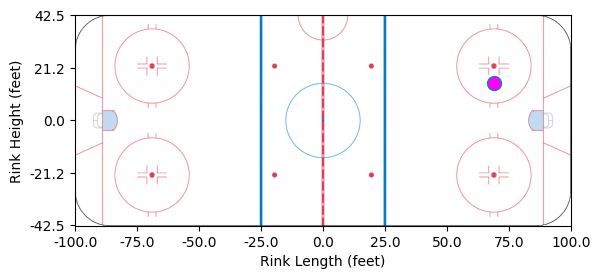

In [12]:
from ift6758.visualizations import debugging_tool
debugging_tool.display_regular_season("2017") 

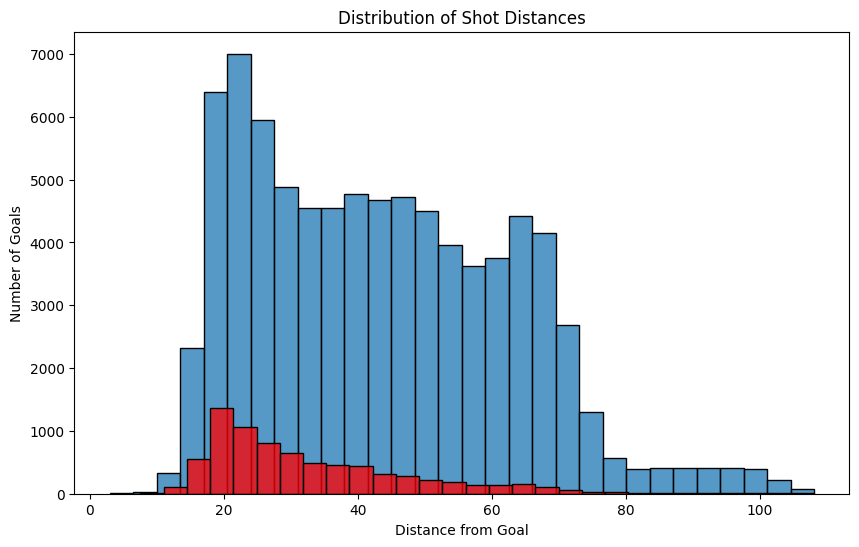

In [4]:
# Calculate the distance from the goal (assuming the goal is at (-100, 0) or (100, 0))
df['distance'] = df.apply(lambda row: min(((row['x_coord'] + 100)**2 + row['y_coord']**2)**0.5, ((row['x_coord'] - 100)**2 + row['y_coord']**2)**0.5), axis=1)
# Plot the distribution of distances
plt.figure(figsize=(10, 6))
bins = 30
sns.histplot(df['distance'], bins=bins, kde=False)
plt.title('Distribution of Shot Distances')
plt.xlabel('Distance from Goal')
plt.ylabel('Frequency')

# Add a secondary y-axis to show the number of goals per bin
ax2 = plt.gca() 
sns.histplot(df[df['is_goal']]['distance'], bins=bins, kde=False, color='r', ax=ax2)
ax2.set_ylabel('Number of Goals')
plt.show()


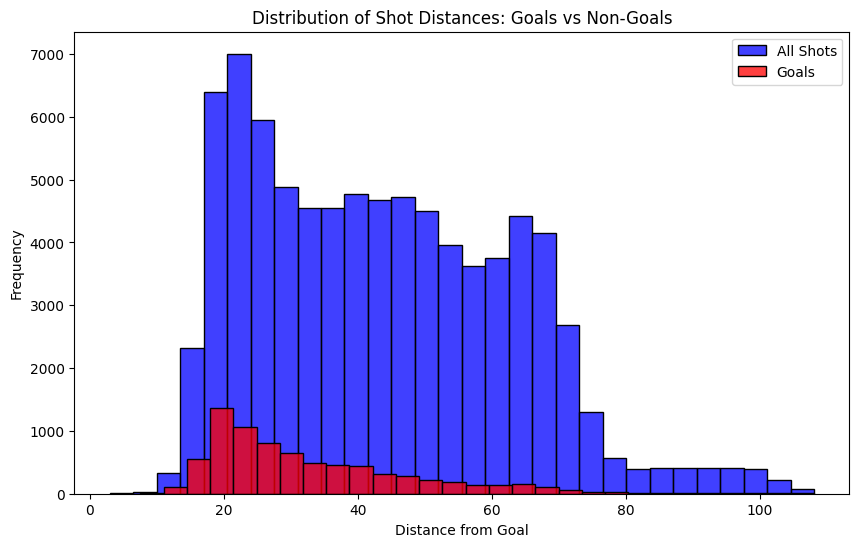

In [5]:
plt.figure(figsize=(10, 6))
bins = 30

# Plot the distribution of distances for all shots
sns.histplot(df['distance'], bins=bins, kde=False, color='blue', label='All Shots')

# Plot the distribution of distances for goals
sns.histplot(df[df['is_goal']]['distance'], bins=bins, kde=False, color='red', label='Goals')

plt.title('Distribution of Shot Distances: Goals vs Non-Goals')
plt.xlabel('Distance from Goal')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
# Calculate the proportion of goals vs non-goals based on distance
goal_vs_non_goal_proportion = goal_vs_non_goal_counts.div(goal_vs_non_goal_counts.sum(axis=1), axis=0)

# Create bins for distance
df['distance_bin'] = pd.cut(df['distance'], bins=7)

# Group by distance_bin and is_goal, then count the occurrences
goal_vs_non_goal_counts = df.groupby(['distance_bin', 'is_goal']).size().unstack().fillna(0)

# Calculate the proportion of goals vs non-goals based on distance
goal_vs_non_goal_proportion = goal_vs_non_goal_counts.div(goal_vs_non_goal_counts.sum(axis=1), axis=0)

# Plot the proportion of goals vs non-goals
goal_vs_non_goal_proportion.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Proportion of Goals vs Non-Goals by Distance Bins')
plt.xlabel('Distance from Goal')
plt.ylabel('Proportion')
plt.legend(title='Event Type', labels=['Non-Goal', 'Goal'])
plt.show()

NameError: name 'goal_vs_non_goal_counts' is not defined

In [10]:
import numpy as np

data = np.random.randn(1000)  # Example data
num_bins = int(np.sqrt(len(data)))

In [11]:
import numpy as np

data = np.random.randn(1000)  # Example data
num_bins = int(np.ceil(np.log2(len(data)) + 1))

In [12]:
import numpy as np

data = np.random.randn(1000)  # Example data
num_bins = int(2 * (len(data) ** (1/3)))

C:\Users\dre\AppData\Local\Temp\ipykernel_2500\3153811590.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_vs_non_goal_counts = df.groupby(['distance_bin', 'is_goal']).size().unstack().fillna(0)


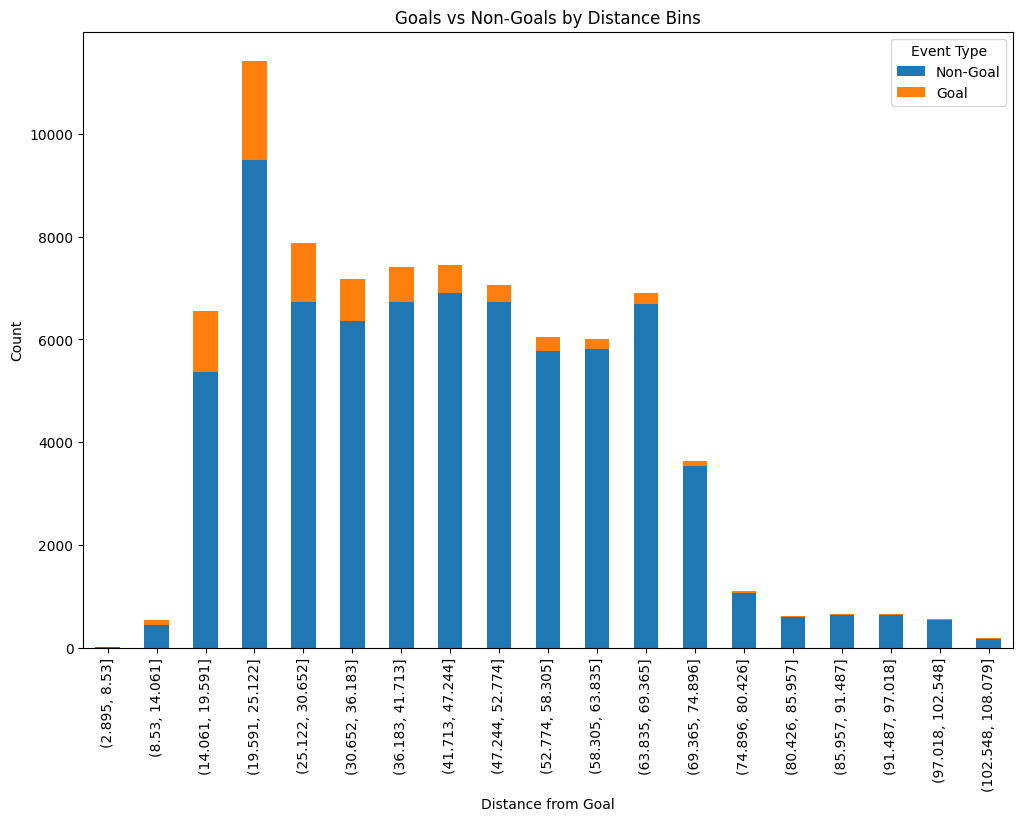

In [13]:


# Create a new column to indicate if the event was a goal
df['is_goal'] = df['type'] == 'goal'

# Create bins for distance
df['distance_bin'] = pd.cut(df['distance'], bins=num_bins)

# Group by distance_bin and is_goal, then count the occurrences
goal_vs_non_goal_counts = df.groupby(['distance_bin', 'is_goal']).size().unstack().fillna(0)

# Plot the data
goal_vs_non_goal_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Goals vs Non-Goals by Distance Bins')
plt.xlabel('Distance from Goal')
plt.ylabel('Count')
plt.legend(title='Event Type', labels=['Non-Goal', 'Goal'])
plt.show()

In [14]:
print(df['distance_bin'].cat.categories)

IntervalIndex([     (2.895, 8.53],     (8.53, 14.061],   (14.061, 19.591],
                 (19.591, 25.122],   (25.122, 30.652],   (30.652, 36.183],
                 (36.183, 41.713],   (41.713, 47.244],   (47.244, 52.774],
                 (52.774, 58.305],   (58.305, 63.835],   (63.835, 69.365],
                 (69.365, 74.896],   (74.896, 80.426],   (80.426, 85.957],
                 (85.957, 91.487],   (91.487, 97.018],  (97.018, 102.548],
               (102.548, 108.079]],
              dtype='interval[float64, right]')


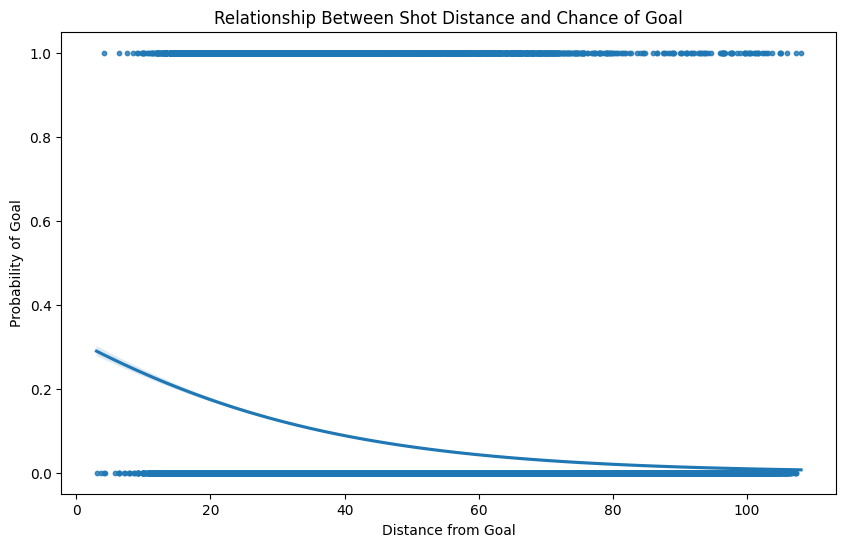

In [15]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.regplot(x='distance', y='is_goal', data=df, logistic=True, scatter_kws={'s': 10})
plt.title('Relationship Between Shot Distance and Chance of Goal')
plt.xlabel('Distance from Goal')
plt.ylabel('Probability of Goal')
plt.show()

# figure 3.3

C:\Users\dre\AppData\Local\Temp\ipykernel_2500\2597462338.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_percentage = df.groupby(['distance_bin', 'shot_type'])['is_goal'].mean().reset_index()


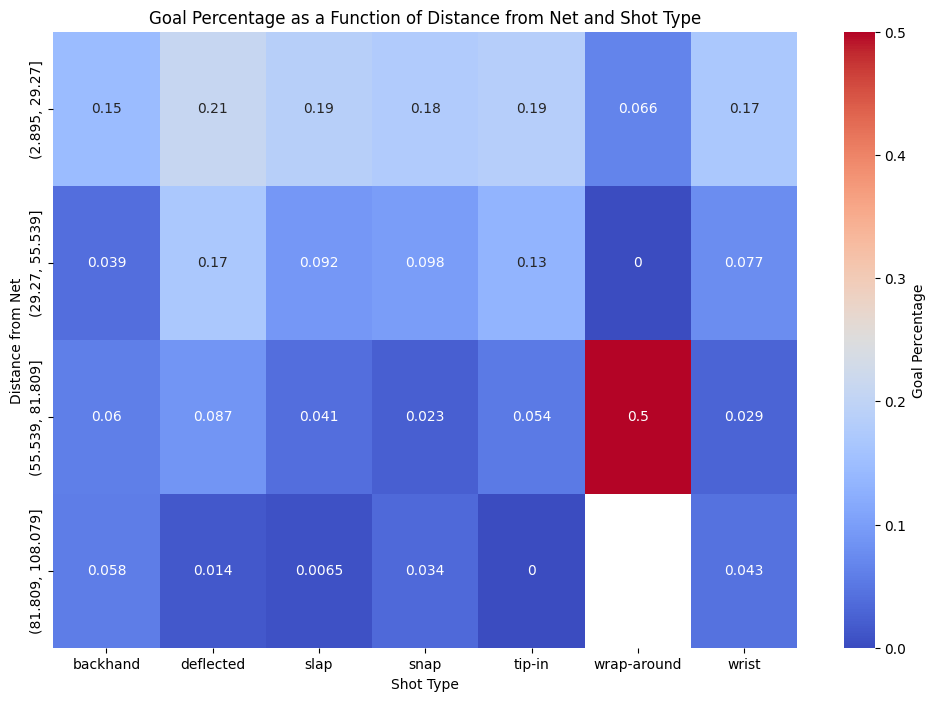

In [16]:
# Create a new column to indicate if the event was a goal
df['is_goal'] = df['type'] == 'goal'

# Create bins for distance
df['distance_bin'] = pd.cut(df['distance'], bins=4)

# Calculate goal percentage for each combination of distance bin and shot type
goal_percentage = df.groupby(['distance_bin', 'shot_type'])['is_goal'].mean().reset_index()

# Pivot the data for easier plotting
goal_percentage_pivot = goal_percentage.pivot(index='distance_bin', columns='shot_type', values='is_goal')

# Plot the data
plt.figure(figsize=(12, 8))
sns.heatmap(goal_percentage_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Goal Percentage'})
plt.title('Goal Percentage as a Function of Distance from Net and Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Distance from Net')
plt.show()

C:\Users\dre\AppData\Local\Temp\ipykernel_2500\1167167206.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_percentage = df.groupby(['distance_bin', 'shot_type'])['is_goal'].mean().reset_index()


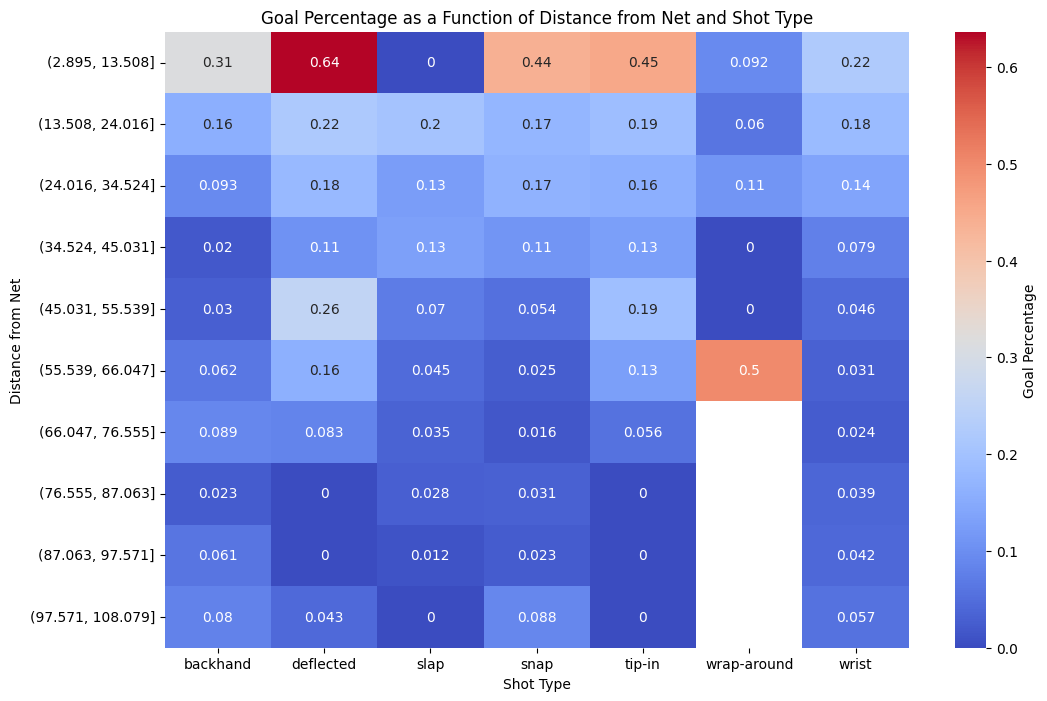

In [17]:
# Create a new column to indicate if the event was a goal
df['is_goal'] = df['type'] == 'goal'

# Create bins for distance
df['distance_bin'] = pd.cut(df['distance'], bins=10)

# Calculate goal percentage for each combination of distance bin and shot type
goal_percentage = df.groupby(['distance_bin', 'shot_type'])['is_goal'].mean().reset_index()

# Pivot the data for easier plotting
goal_percentage_pivot = goal_percentage.pivot(index='distance_bin', columns='shot_type', values='is_goal')

# Plot the data
plt.figure(figsize=(12, 8))
sns.heatmap(goal_percentage_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Goal Percentage'})
plt.title('Goal Percentage as a Function of Distance from Net and Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Distance from Net')
plt.show()